In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6f6c17237c6dc779b53dc2461d1b4ee6


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kommunar
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | turukhansk
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | nanortalik
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | pokosnoye
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | castro marim
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | kahului
Processing Record 17 of Set 1 | doha
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | lakes entrance
Processing Record 20 of Set 1 | winneba
Processing Record 21 of Set 1 | clyde river
Processing Record 22 of Set 1 | vaini
Processing Record 23 of Set 1 | yasnyy
Proc

Processing Record 38 of Set 4 | kavieng
Processing Record 39 of Set 4 | vila do maio
Processing Record 40 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 41 of Set 4 | shimoda
Processing Record 42 of Set 4 | tasiilaq
Processing Record 43 of Set 4 | touros
Processing Record 44 of Set 4 | troitsko-pechorsk
Processing Record 45 of Set 4 | ribeira grande
Processing Record 46 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 4 | tonneins
Processing Record 48 of Set 4 | caravelas
Processing Record 49 of Set 4 | kangaatsiaq
Processing Record 50 of Set 4 | santa maria
Processing Record 1 of Set 5 | slave lake
Processing Record 2 of Set 5 | eldikan
City not found. Skipping...
Processing Record 3 of Set 5 | tema
Processing Record 4 of Set 5 | one hundred mile house
City not found. Skipping...
Processing Record 5 of Set 5 | faya
Processing Record 6 of Set 5 | beloha
Processing Record 7 of Set 5 | victoria
Processing Record 8 of Set 5 | hachinohe

Processing Record 29 of Set 8 | cabedelo
Processing Record 30 of Set 8 | hauterive
Processing Record 31 of Set 8 | metamorfosis
City not found. Skipping...
Processing Record 32 of Set 8 | zhigansk
Processing Record 33 of Set 8 | makakilo city
Processing Record 34 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 35 of Set 8 | beba
Processing Record 36 of Set 8 | mapimi
Processing Record 37 of Set 8 | warqla
City not found. Skipping...
Processing Record 38 of Set 8 | hofn
Processing Record 39 of Set 8 | metehara
City not found. Skipping...
Processing Record 40 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 41 of Set 8 | dolbeau
City not found. Skipping...
Processing Record 42 of Set 8 | camocim
Processing Record 43 of Set 8 | port blair
Processing Record 44 of Set 8 | puro
Processing Record 45 of Set 8 | abha
Processing Record 46 of Set 8 | los llanos de aridane
Processing Record 47 of Set 8 | charleston
Processing Record 48 of Set 8 | marau
Proces

Processing Record 16 of Set 12 | nakasongola
Processing Record 17 of Set 12 | canete
Processing Record 18 of Set 12 | saint-paul
Processing Record 19 of Set 12 | kigoma
Processing Record 20 of Set 12 | myrtle beach
Processing Record 21 of Set 12 | marion
Processing Record 22 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 23 of Set 12 | progreso
Processing Record 24 of Set 12 | floro
Processing Record 25 of Set 12 | mandalgovi
Processing Record 26 of Set 12 | roald
Processing Record 27 of Set 12 | mogadishu
Processing Record 28 of Set 12 | azuqueca de henares
Processing Record 29 of Set 12 | bilma
Processing Record 30 of Set 12 | kotdwara
Processing Record 31 of Set 12 | ortona
Processing Record 32 of Set 12 | puerto escondido
Processing Record 33 of Set 12 | murud
Processing Record 34 of Set 12 | pembroke
Processing Record 35 of Set 12 | iskateley
Processing Record 36 of Set 12 | japura
Processing Record 37 of Set 12 | charleroi
Processing Record 38 of Set 12 | cel

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kommunar,59.6206,30.3900,5.00,85,75,8.95,RU,2021-01-15 16:06:20
1,Busselton,-33.6500,115.3333,61.00,70,0,7.00,AU,2021-01-15 16:03:29
2,Kodiak,57.7900,-152.4072,33.80,86,75,6.08,US,2021-01-15 16:06:20
3,Turukhansk,65.8167,87.9833,-35.41,80,3,5.03,RU,2021-01-15 16:06:20
4,Avarua,-21.2078,-159.7750,78.80,83,40,2.30,CK,2021-01-15 16:06:20
5,Nanortalik,60.1432,-45.2371,27.54,95,93,5.68,GL,2021-01-15 16:06:20
6,Nikolskoye,59.7035,30.7861,5.00,85,75,8.95,RU,2021-01-15 16:06:20
7,Pokosnoye,55.5258,101.0536,-1.71,91,100,11.70,RU,2021-01-15 16:06:20
8,Puerto Ayora,-0.7393,-90.3518,82.40,65,0,9.22,EC,2021-01-15 16:06:21
9,Castro Marim,37.2207,-7.4435,59.00,44,0,7.00,PT,2021-01-15 16:06:21


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kommunar,RU,2021-01-15 16:06:20,59.6206,30.3900,5.00,85,75,8.95
1,Busselton,AU,2021-01-15 16:03:29,-33.6500,115.3333,61.00,70,0,7.00
2,Kodiak,US,2021-01-15 16:06:20,57.7900,-152.4072,33.80,86,75,6.08
3,Turukhansk,RU,2021-01-15 16:06:20,65.8167,87.9833,-35.41,80,3,5.03
4,Avarua,CK,2021-01-15 16:06:20,-21.2078,-159.7750,78.80,83,40,2.30
5,Nanortalik,GL,2021-01-15 16:06:20,60.1432,-45.2371,27.54,95,93,5.68
6,Nikolskoye,RU,2021-01-15 16:06:20,59.7035,30.7861,5.00,85,75,8.95
7,Pokosnoye,RU,2021-01-15 16:06:20,55.5258,101.0536,-1.71,91,100,11.70
8,Puerto Ayora,EC,2021-01-15 16:06:21,-0.7393,-90.3518,82.40,65,0,9.22
9,Castro Marim,PT,2021-01-15 16:06:21,37.2207,-7.4435,59.00,44,0,7.00


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

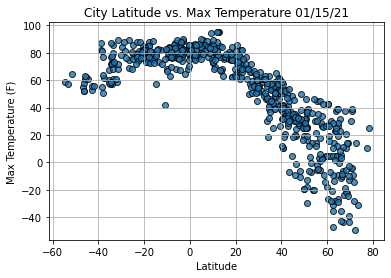

In [14]:
#Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

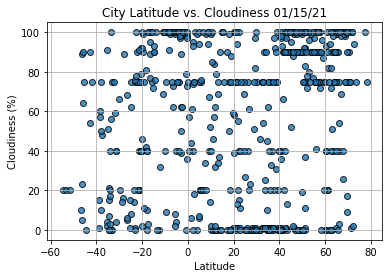

In [15]:
#Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

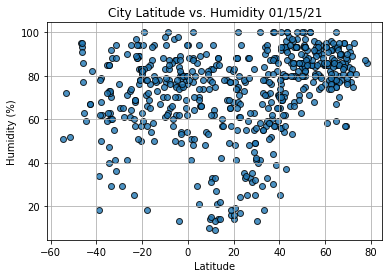

In [16]:
#Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

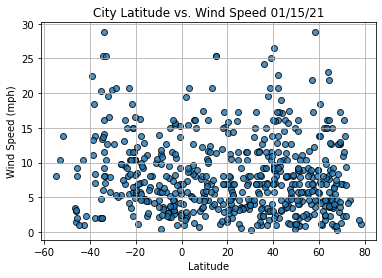

In [17]:
#Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

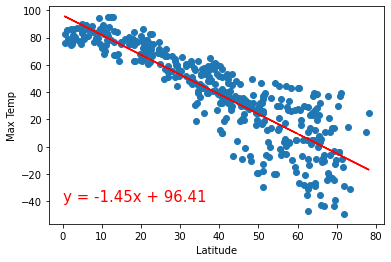

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere\for Maximum Temperature", 'Max Temp',(0,-40))


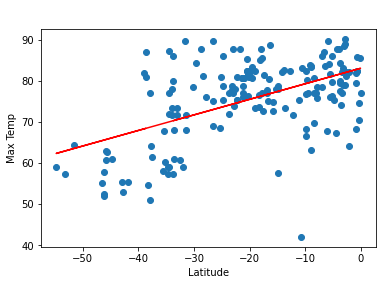

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere\for Maximum Temperature", 'Max Temp',(-55,95))

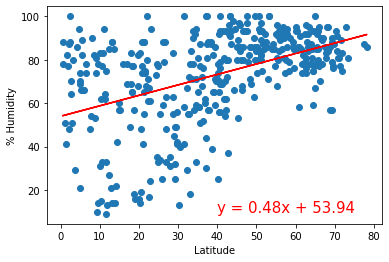

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

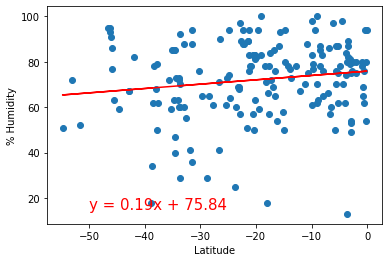

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,15))

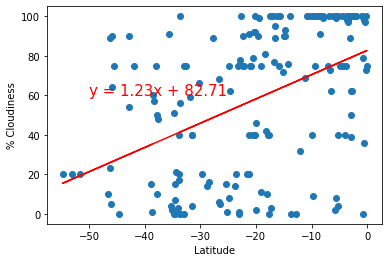

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


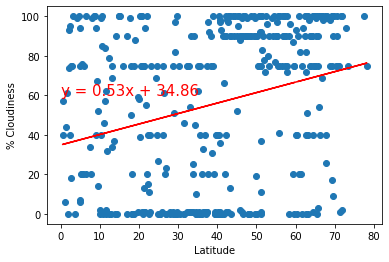

In [25]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,60))


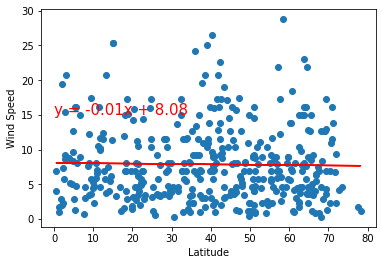

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \for Wind Speed', 'Wind Speed',(0,15))


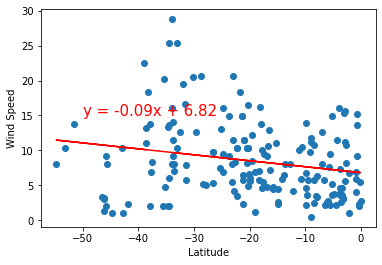

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))